# ** Exploratory Data Analysis (EDA) and Business Insights Report .ipynb**

This notebook analyzes the sales data of an online retail business to gain insights into sales trends, top-selling products, and customer buying patterns. The main objectives are:

1. Understand which products and categories generate the most revenue.
2. Identify seasonal trends and peak sales periods.
3. Segment customers based on their purchase behavior to help the business make informed decisions.

The analysis uses visualizations such as bar charts, line charts, scatter plots, and correlation heatmaps to provide a clear understanding of the business performance and customer behavior.


In [10]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
# Load the dataset
path = "/content/online_retail_II.xlsx"
df = pd.read_excel(path)

# **Data Profiling**

In [15]:
# Show first 5 rows
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [16]:
# show last 5 rows
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [17]:
df.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
241693,512751,48138,DOOR MAT UNION FLAG,1,2010-06-17 15:08:00,7.49,17953.0,United Kingdom
518727,537640,20723,STRAWBERRY CHARLOTTE BAG,56,2010-12-07 15:31:00,2.51,NaN,United Kingdom
279071,516548,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,2,2010-07-21 12:11:00,2.13,NaN,United Kingdom
262581,514723,21462,"NURSERY A,B,C PAINTED LETTERS",4,2010-07-05 17:28:00,6.75,14818.0,United Kingdom
432908,530799,20973,12 PENCIL SMALL TUBE WOODLAND,48,2010-11-04 12:31:00,0.65,12497.0,Germany


In [18]:
# show number of rows and columns present
df.shape

(525461, 8)

In [19]:
# show column names
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [20]:
# show datatypes
df.dtypes

,0
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
Price,float64
Customer ID,float64
Country,object


In [21]:
# show datatype and non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [22]:
# show count of unique values
df.nunique()

,0
Invoice,28816
StockCode,4632
Description,4681
Quantity,825
InvoiceDate,25296
Price,1606
Customer ID,4383
Country,40


In [23]:
# show number of non-missing (non-NaN) values in each column
df.count()

,0
Invoice,525461
StockCode,525461
Description,522533
Quantity,525461
InvoiceDate,525461
Price,525461
Customer ID,417534
Country,525461


In [24]:
# show summary statistics of numerical columns
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [25]:
# show total no.of duplicate values
df.duplicated().sum()

np.int64(6865)

In [26]:
# show no.of null values
df.isnull().sum().sum()

np.int64(110855)

In [27]:
# show which column has null values
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [28]:
# Checking for outliers using IQR method
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Calculate outliers for each column using broadcasting
outliers = ((df.select_dtypes(include=np.number) < (Q1 - 1.5 * IQR)) | (df.select_dtypes(include=np.number) > (Q3 + 1.5 * IQR))).sum()
outliers

,0
Quantity,57870
Price,35273
Customer ID,0


# **Data Cleaning and Preprocessing**

In [29]:
# Remove duplicates
df = df.drop_duplicates()

In [50]:
# Drop rows with missing Customer ID for customer analysis
df_customers = df.dropna(subset=['Customer ID']).copy()
df_customers['Customer ID'] = df_customers['Customer ID'].astype(int)
print("Rows with Customer ID:", df_customers.shape[0])

Rows with Customer ID: 410763


In [32]:
# Flag outliers for Quantity and UnitPrice
df['Quantity_outlier'] = df['Quantity'].apply(lambda x: 'Yes' if x < 0 or x > 500 else 'No')
df['Price_outlier'] = df['Price'].apply(lambda x: 'Yes' if x < 0 or x > 500 else 'No')
f_filtered = df[(df['Quantity'] >= 0) & (df['Quantity'] <= 500) & (df['Price'] >= 0) & (df['Price'] <= 500)]

In [34]:
# Feature Engineering
df['TotalSales'] = df['Quantity'] * df['Price']
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Weekday'] = df['InvoiceDate'].dt.day_name()

# **Exploratory Data Analysis**

/tmp/ipython-input-729105798.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantity_sales = df.groupby('QuantityRange')['TotalSales'].sum()


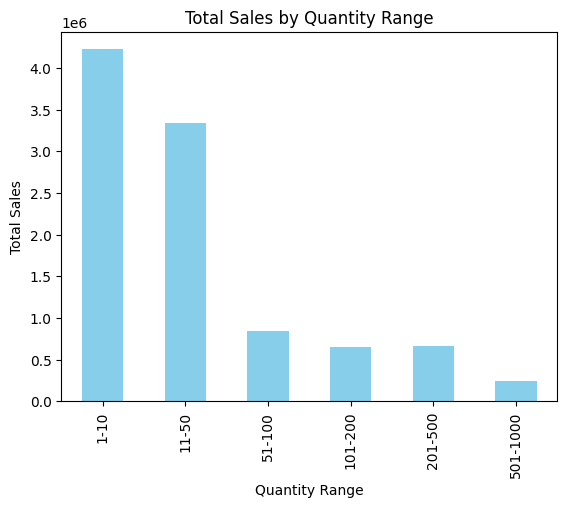

In [52]:
# Total Sales by Quantity Range
df['QuantityRange'] = pd.cut(df['Quantity'], bins=[0,10,50,100,200,500,1000],
                             labels=['1-10','11-50','51-100','101-200','201-500','501-1000'])
quantity_sales = df.groupby('QuantityRange')['TotalSales'].sum()
quantity_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Quantity Range")
plt.xlabel("Quantity Range")
plt.ylabel("Total Sales")
plt.show()

/tmp/ipython-input-1997489495.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_sales = df.groupby('PriceRange')['TotalSales'].sum()


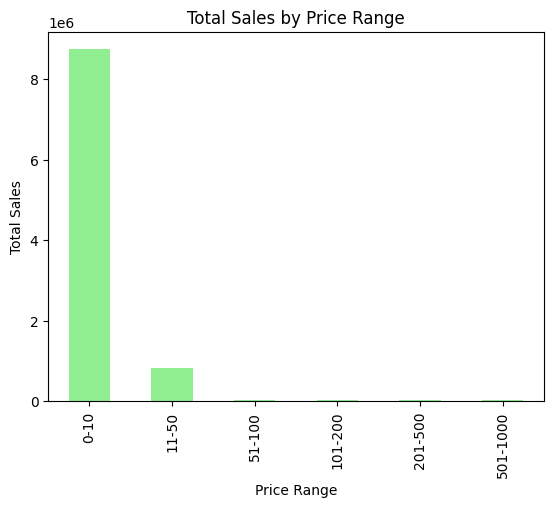

In [53]:
#Total Sales by Price Range
df['PriceRange'] = pd.cut(df['Price'], bins=[0,10,50,100,200,500,1000],
                          labels=['0-10','11-50','51-100','101-200','201-500','501-1000'])
price_sales = df.groupby('PriceRange')['TotalSales'].sum()
price_sales.plot(kind='bar', color='lightgreen')
plt.title("Total Sales by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Total Sales")
plt.show()

/tmp/ipython-input-186837199.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


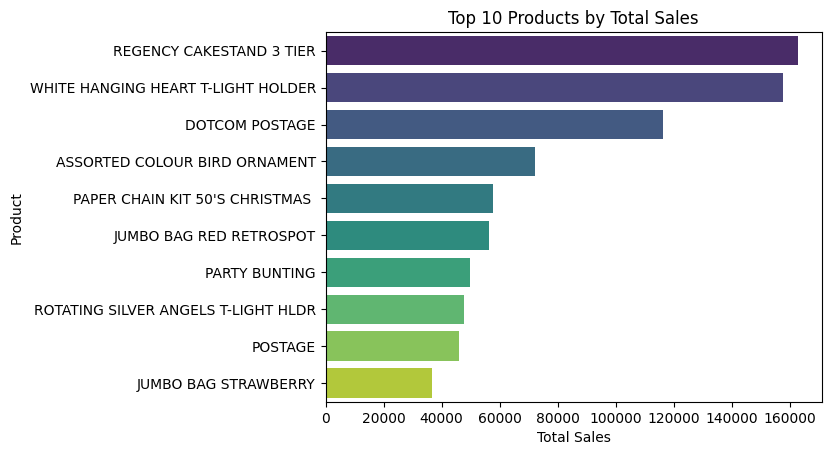

In [42]:
#  Top-Selling Products
top_products = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.show()

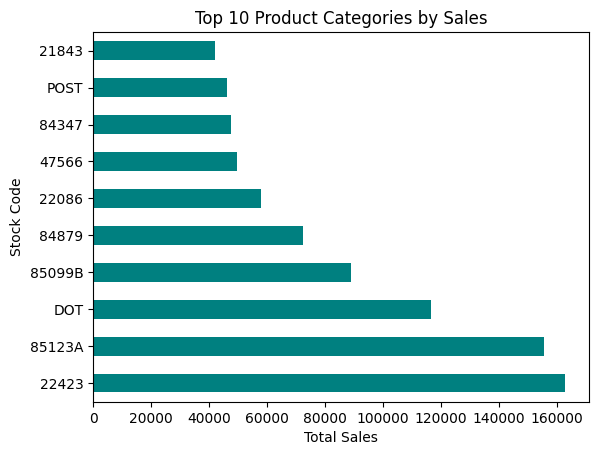

In [43]:
# Top-Selling Product Categories
category_sales = df.groupby('StockCode')['TotalSales'].sum().sort_values(ascending=False).head(10)
category_sales.plot(kind='barh', color='teal')
plt.title("Top 10 Product Categories by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Stock Code")
plt.show()

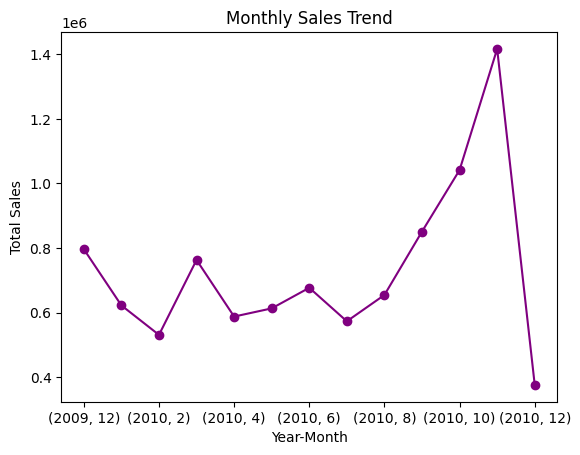

In [44]:
# Monthly Sales Trend
monthly_sales = df.groupby(['Year','Month'])['TotalSales'].sum()
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Year-Month")
plt.show()

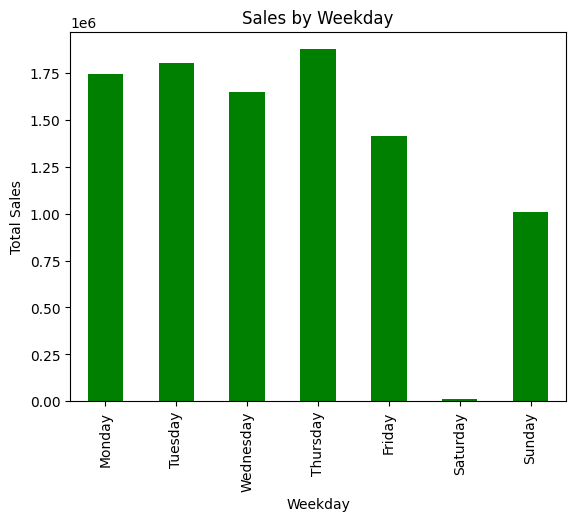

In [45]:
# Weekly Sales Trend
weekday_sales = df.groupby('Weekday')['TotalSales'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
weekday_sales.plot(kind='bar', color='green')
plt.title("Sales by Weekday")
plt.ylabel("Total Sales")
plt.show()

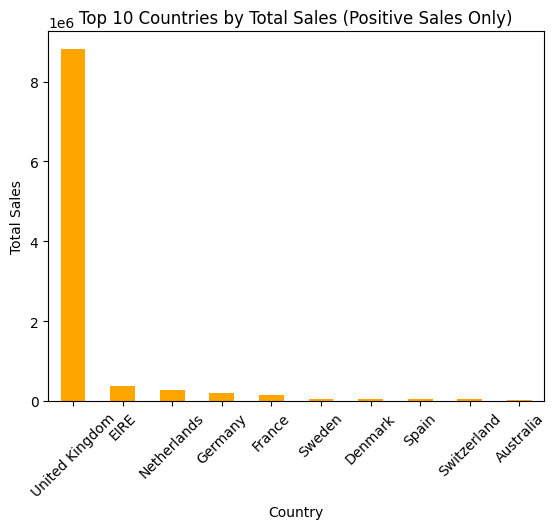

In [65]:
# Sales by Country (Bar Chart)
country_sales = df[df['TotalSales']>0].groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

# show only top 10 countries for clarity
top_countries = country_sales.head(10)

top_countries.plot(kind='bar', color='orange')
plt.title("Top 10 Countries by Total Sales (Positive Sales Only)")
plt.ylabel("Total Sales")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()


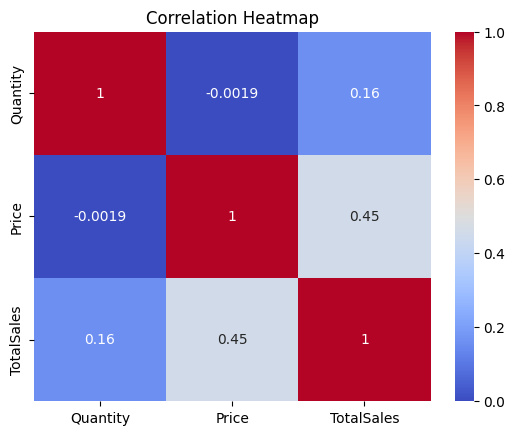

In [47]:
#Correlation Analysis
sns.heatmap(df[['Quantity','Price','TotalSales']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [58]:
# Customer Segmentation / Buying Patterns
# Only customers with known Customer ID
df_customers = df.dropna(subset=['Customer ID']).copy()
df_customers['Customer ID'] = df_customers['Customer ID'].astype(int)

snapshot_date = df_customers['InvoiceDate'].max() + pd.Timedelta(days=1)

In [59]:
# Aggregate customer data
customer_summary = df_customers.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Days since last purchase
    'Invoice': 'nunique',  # Number of orders
    'TotalSales': 'sum'  # Total amount spent
})
customer_summary.columns = ['DaysSinceLastPurchase', 'NumberOfOrders', 'TotalSpent']

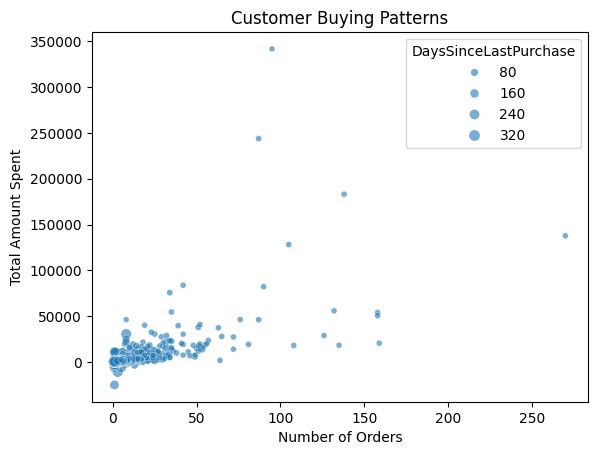

In [60]:
# Visualize customer buying patterns
sns.scatterplot(x='NumberOfOrders', y='TotalSpent', size='DaysSinceLastPurchase', data=customer_summary, alpha=0.6)
plt.title("Customer Buying Patterns")
plt.xlabel("Number of Orders")
plt.ylabel("Total Amount Spent")
plt.show()

Customers in the top-right → frequent and high spenders

Customers in the bottom-left → infrequent and low spenders

Customers with large point size → haven’t purchased recently

# **Conclusion**

**Key Conclusions from the Data**

1. Most Orders & Sales
   - Majority of orders are in moderate Quantity and Price ranges.
   - Certain products and categories dominate total sales.

2. Sales Trends
   - Sales peak during specific months and weekdays.
   - Top 10 countries generate most of the revenue.

3. Customer Behavior
   - Some customers order frequently and spend significantly more than others.

4. Data Relationships
   - Quantity and Price have a strong influence on total sales.
